Cho DataSet lấy từ file B72.csv của các hộ gồm các trường sau:

- MaLo: Mã lô đất
- MatTien: Đường mặt tiền (m)
- DienTich: Diện tích lô đất (m²)
- LoaiDat: Loại đất
1: Đất nông nghiệp,
2: Đất không thời hạn,
x (x là số năm): Đất có thời hạn
- Dùng Jupyter Notebook (hoặc Colab) để trả lời các câu hỏi sau.
(Đặt tên file: STT_HoVaTen_MSSV.ipynb và STT_HoVaTen_MSSV.pdf)



Câu 1 (3.0 điểm)
- a. Đọc dữ liệu file trên vào DataFrame có tên df và hiển thị:
 5 dòng đầu tiên
 5 dòng ngẫu nhiên
 Kích thước df
 Số dòng df
 Số cột df
- b. Thống kê có bao nhiêu lô đất nông nghiệp và đất không thời hạn. Vẽ biểu đồ pie minh họa.

- c. Tính giá trị thống kê trung bình (mean) của diện tích cho các lô đất có thời hạn trên 15 năm.

In [53]:
import pandas as pd 
df = pd.read_csv("B72.csv")
df

,MaLo,MatTien,DienTich,LoaiDat
0,L001,17,318,1
1,L002,8,216,1
2,L003,18,217,1
3,L004,13,340,1
4,L005,11,145,1
5,L006,19,259,2
6,L007,7,71,26
7,L008,15,421,2
8,L009,6,64,1
9,L010,28,104,9


In [2]:
df.head()

,MaLo,MatTien,DienTich,LoaiDat
0,L001,17,318,1
1,L002,8,216,1
2,L003,18,217,1
3,L004,13,340,1
4,L005,11,145,1


In [4]:
df.sample(5)

,MaLo,MatTien,DienTich,LoaiDat
14,L015,27,130,1
2,L003,18,217,1
18,L019,18,252,22
19,L020,8,267,1
10,L011,7,181,29


In [6]:
# kich thuoc
df.shape

(20, 4)

In [32]:
# dong 
df.shape[0]

20

In [33]:
# cot
df.shape[1]

6

In [46]:

dat_nong_nghiep = df[df['LoaiDat'] == 1]['LoaiDat'].count()
dat_khong_thoi_han = df[df['LoaiDat'] == 2]['LoaiDat'].count()
print(dat_nong_nghiep)
print(dat_khong_thoi_han)

11
4


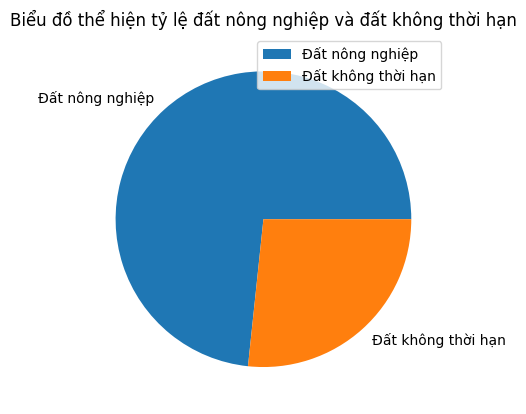

In [49]:
import matplotlib.pyplot as plt
plt.pie([dat_nong_nghiep, dat_khong_thoi_han], labels=['Đất nông nghiệp', 'Đất không thời hạn'])
plt.title("Biểu đồ thể hiện tỷ lệ đất nông nghiệp và đất không thời hạn")
plt.legend()
plt.show()

Nhận xét: 
=> đất nông nghiệp chiến số lượng nhiều hơn so với đất không thời hạn 

In [54]:
print("Giá trị trung bình của đất lớn hơn 15 năm", df[df['LoaiDat'] > 15]['DienTich'].mean())

Giá trị trung bình của đất lớn hơn 15 năm 248.5


Câu 2 (2.0 điểm)
Chèn thêm cột TienGiaDat (triệu đồng) với quy tắc:

+ Đất nông nghiệp: TienGiaDat = DienTich x 3
+ Đất không thời hạn: TienGiaDat = DienTich x (MatTien ^ 2)
+ Đất có thời hạn: Ghi "Không xác định giá trị"


In [9]:
def tinhTienGiaDat(row):
    if row['LoaiDat'] == 1:
        return row['DienTich'] * 3
    elif row['LoaiDat'] == 2:
        return row['DienTich'] * row['MatTien'] ** 2
    else:
        return "Không xác định giá trị"

In [11]:
df['TienGiaDat'] = df.apply(tinhTienGiaDat, axis=1)
print(df)

    MaLo  MatTien  DienTich  LoaiDat              TienGiaDat
0   L001       17       318        1                     954
1   L002        8       216        1                     648
2   L003       18       217        1                     651
3   L004       13       340        1                    1020
4   L005       11       145        1                     435
5   L006       19       259        2                   93499
6   L007        7        71       26  Không xác định giá trị
7   L008       15       421        2                   94725
8   L009        6        64        1                     192
9   L010       28       104        9  Không xác định giá trị
10  L011        7       181       29  Không xác định giá trị
11  L012       27        96        1                     288
12  L013       18       354        2                  114696
13  L014       17       424        1                    1272
14  L015       27       130        1                     390
15  L016       18       

Câu 3 (2.0 điểm)
Chèn thêm cột ChuyenDoi (Chuyển đổi đất) với quy tắc:

- Đất nông nghiệp (LoaiDat = 1): ChuyenDoi = DienTich x 18 (triệu đồng)
- Các loại đất khác: "Chưa có công văn"
- Trích lọc ra các lô đất được phép chuyển đổi.



In [12]:
def cachChuyenDoi(row):
    if row['LoaiDat'] == 1:
        return row['DienTich'] * 18
    else:
        return "Chưa có công văn"

In [14]:
df['ChuyenDoi'] = df.apply(cachChuyenDoi, axis=1)
print(df)
print(df[df['ChuyenDoi'] != "Chưa có công văn"])

    MaLo  MatTien  DienTich  LoaiDat              TienGiaDat         ChuyenDoi
0   L001       17       318        1                     954              5724
1   L002        8       216        1                     648              3888
2   L003       18       217        1                     651              3906
3   L004       13       340        1                    1020              6120
4   L005       11       145        1                     435              2610
5   L006       19       259        2                   93499  Chưa có công văn
6   L007        7        71       26  Không xác định giá trị  Chưa có công văn
7   L008       15       421        2                   94725  Chưa có công văn
8   L009        6        64        1                     192              1152
9   L010       28       104        9  Không xác định giá trị  Chưa có công văn
10  L011        7       181       29  Không xác định giá trị  Chưa có công văn
11  L012       27        96        1                

Câu 4 (3.0 điểm)
- a. Giả sử Diện tích có phân phối chuẩn. Hãy xây dựng hàm mật độ xác suất cho Diện tích.

- b. Vẽ đồ thị phân phối chuẩn cho Diện tích. Điều chỉnh xlim, ylim phù hợp.

- c. Tính tỷ lệ (%) số lô đất có Diện tích dưới 150 m².



In [17]:
# phân phối tại một điểm thì ta sử dụng hàm pdf 
# phân phối tại [-vô cùng, điểm cần xét] thì dùng cdf 
# cả hai hàm cần truyền vào 3 biến (số chỗ điểm cần xét, mean, std)
import scipy.stats as stats


In [18]:
trung_binh = df['DienTich'].mean()
do_lech_chuan = df['DienTich'].std()

In [19]:
def ham_mat_do_xac_xuat(x, mean, std):
    return stats.norm.pdf(x, mean, std)

In [20]:
import numpy as np
x = np.linspace(df['DienTich'].min(), df['DienTich'].max(), 100)
y = ham_mat_do_xac_xuat(x, trung_binh, do_lech_chuan)

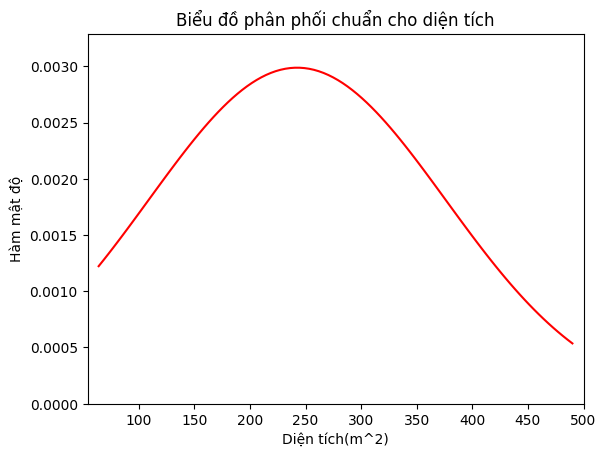

In [28]:
import matplotlib.pyplot as plt
plt.plot(x, y, color='red')
plt.xlabel("Diện tích(m^2)")
plt.ylabel("Hàm mật độ")
plt.title("Biểu đồ phân phối chuẩn cho diện tích")
plt.xlim(df['DienTich'].min() - 10, df['DienTich'].max() + 10)
plt.ylim(0, max(y) * 1.1)
plt.show()

Nhận xét:
- khi một độ đạt tới khoảng 230 nó sẽ đạt cực đại 
- khi tăng lên nữa thì mật độ có xu hướng càng ngày càng giảm 
- khi [0-230] thì mật độ có xu hướng tăng

In [29]:
duoi_150 = stats.norm.cdf(150, trung_binh, do_lech_chuan)
print("Tỷ lệ phần trăm số lô dưới 150 m^2", duoi_150)

Tỷ lệ phần trăm số lô dưới 150 m^2 0.24424392519758953
